# Sentiment Analysis with Keras

# Import libraries and download data

In [1]:
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


17465344/17464789 [==============================] - 6s 0us/step


Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 
The above code load dataset and creates a dictionary mapping the words in all 50,000 reviews to integers indicating the words' relative frequency of occurrence. Each word is assigned a unique integer. The most common word is assigned the number 1, the second most common word is assigned the number 2, and so on. load_data also returns a pair of tuples containing the movie reviews (in this example, x_train and x_test) and the 1s and 0s classifying those reviews as positive and negative (y_train and y_test).

In [3]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

x_train and x_test is a list of 25,000 lists representing 25,000 reviews. 

# Dictionary mapping words to integers

In [4]:
# dictionary
imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

# Reverse-encode a review to original text

In [5]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Reviews are already converted to lowercase and punctuation characters are removed. To train our model we need all the reviews of same length. Let's do it.

In [6]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Create a neural network

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


# Model training

In [8]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.5771 - accuracy: 0.6512 - val_loss: 0.3257 - val_accuracy: 0.8595
Epoch 2/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.2161 - accuracy: 0.9152 - val_loss: 0.2867 - val_accuracy: 0.8820
Epoch 3/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0746 - accuracy: 0.9782 - val_loss: 0.3534 - val_accuracy: 0.8718
Epoch 4/5
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0174 - accuracy: 0.9971 - val_loss: 0.4276 - val_accuracy: 0.8707
Epoch 5/5
25000/25000 [==============================] - 28s 1ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 0.4812 - val_accuracy: 0.8690


This model is unusual in that it learns well with just a few epochs. The training accuracy quickly zooms to near 100%, while the validation accuracy goes up for an epoch or two and then flattens out. You generally don't want to train a model for any longer than is required for these accuracies to stabilize. The risk is overfitting, which results in the model performing well against test data but not so well with real-world data. One indication that a model is overfitting is a growing discrepancy between the training accuracy and the validation accuracy.

# Training and validation Accuracy

In [9]:
hist.history

{'val_loss': [0.3257107403659821,
  0.28673558829784396,
  0.35336425508022307,
  0.42756094373703,
  0.48115536573410034],
 'val_accuracy': [0.8594800233840942,
  0.8820400238037109,
  0.8718000054359436,
  0.8706799745559692,
  0.8689600229263306],
 'loss': [0.5770507189130784,
  0.21611371616840364,
  0.07461751003921031,
  0.017396169947385787,
  0.004514025451913476],
 'accuracy': [0.65124, 0.9152, 0.97816, 0.99712, 0.99956]}

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


[]

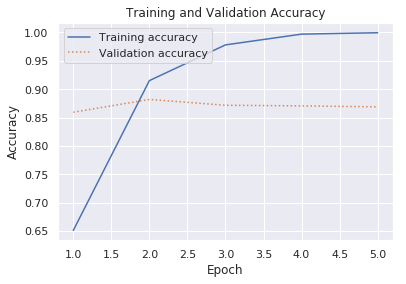

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Another way to check for overfitting is to compare training loss to validation loss as training proceeds. Optimization problems such as this seek to minimize a loss function.For a given epoch, training loss, much greater than validation loss, can be evidence of overfitting.

# Training and validation Loss

[]

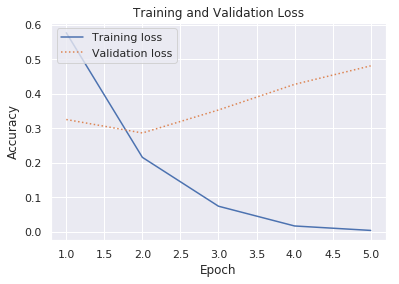

In [11]:
sns.set()
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, train_loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Given that the gap between training and validation loss begins increasing in the third epoch, means model is overfitting

# Model Evaluation

In [12]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.90%


# Analyze Text for Sentiment

In [16]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [17]:
analyze('Easily the most stellar experience I have ever had.')

0.97554475

Positive sentiments

In [19]:
analyze('The long lines and poor customer service really turned me off.')

0.108632945

Negative sentiments

In [18]:
analyze("Behance is the world's largest creative network for showcasing and discovering creative work.")

0.9915462

Positive sentiments

Even though the model was trained with movie reviews, it isn't limited to analyzing movie reviews but can also quantify sentiments of any text string. That makes sense because there are inherent similarities between language expressing the like or dislike of a movie and words expressing feelings about other unrelated subjects.